In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.get("https://www.google.com/")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
inp=driver.find_element_by_name("q")
string=str(input("Enter the game name u want to search for"))
inp.send_keys(string," review metacritic")

In [ ]:
press_search=driver.find_element_by_name("btnK")
press_search.click()

In [ ]:
links=driver.find_element_by_class_name('yuRUbf')
links.click()

In [ ]:
from selenium.common.exceptions import NoSuchElementException
try:
   all_review=driver.find_element_by_class_name('see_all')
   all_review.click()
except NoSuchElementException:
  print("SORRY THE GAME DONT HAVE ANY REVIEWS YET OR HAVE NOT BEEN RELEASED")

In [ ]:
user_reviews=driver.find_element_by_class_name('nav_user_reviews')
user_reviews.click()

In [ ]:
pages=driver.find_element_by_class_name("pages")
p=pages.text
p=list(p.split("\n"))
page_count=int(p[len(p)-1])
def clean_store_data(text,reviews):
    for i in text:
     temp=i.text
   #  if temp!="":
     reviews.append(temp)

In [ ]:
reviews=[]
def get_reviews(p):
 k=1
 for i in range(p):
       next_button=driver.find_element_by_class_name("next")
       try:
         next_button.click()
       except StaleElementReferenceException:
        page_count-=1
        continue
       text=driver.find_elements_by_class_name("review_body")
       clean_store_data(text,reviews)

In [ ]:
get_reviews(page_count)

In [ ]:
temp=[]
text=driver.find_elements_by_class_name("review_body")
for i in text:
    i=i.text
    temp.append(i)
for i in temp:
    print('*****************')
    print(i)

*****************
Please sign in or create an account before writing a review.
*****************
Funny monkey .
*****************
Far Cry 5 simply takes everything players loved about the previous games, and made them worse.

Minimap replaced with a compass reticule at the top feels odd after playing 4 games with a minimap. Very annoying having to constantly open the Map interface to find anything past 100 meters. Stealth mechanics simply suck. What's the point of having a silencer if enemy NPC's are still














… Expand
*****************
Возможно в игре хороший сюжет и красивая графика, но какая разница, если в ней просто не хочется находиться? Здесь скучно абсолютно всё: скучно рыбачить(зачем это вообще надо??), скучно охотиться(??), даже сектантов убивать скучно. Я долго думал, на что похож новый фар край. На фалаут 4 с его огромным, но бесполезным арсеналом? На ведьмак 3, с его безжизненным открытым миром? На… Expand
*****************
My previous experience with the Far Cry

In [ ]:
import textblob
from textblob import TextBlob
def get_Subjectivity(test):
  return TextBlob(test).sentiment.subjectivity

def get_polarity(test):
  return TextBlob(test).sentiment.polarity

In [ ]:
pol_reviews=[]
for i in range(len(reviews)):
    pol_reviews.append(get_polarity(reviews[i]))

In [ ]:
views=[]
def get_result(i):
    if i<0:
        return "Negative"
    if i==0:
        return "Neutral"
    if i>0:
        return "Positive"

for i in pol_reviews:
    views.append(get_result(i))

In [ ]:
count_pos=0
count_neg=0
count_neut=0
for i in views:
    if i=="Positive":
        count_pos+=1
    if i=="Negative":
        count_neg+=1
    if i=="Neutral":
        count_neut+=1
final_lis=[count_pos, count_neg, count_neut]

([<matplotlib.patches.Wedge at 0x7efdca990750>,
 [Text(-0.18150479212244283, 1.084922121830221, 'Positive'),
  Text(-0.34981265649773985, -1.0428955390421393, 'Negative'),
  Text(0.9708798129030599, -0.5170999795951645, 'Neutral')],
 [Text(-0.09900261388496881, 0.5917757028164842, '55.28%'),
  Text(-0.19080690354422172, -0.5688521122048033, '29.15%'),
  Text(0.5295708070380326, -0.2820545343246352, '15.58%')])

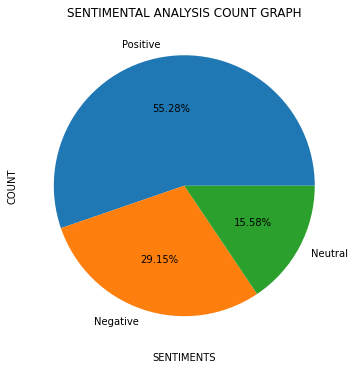

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("SENTIMENTAL ANALYSIS COUNT GRAPH")
plt.xlabel('SENTIMENTS')
plt.ylabel('COUNT')
#plt.bar(collect.keys(),collect.values(),color='Purple')
plt.pie(final_lis,labels=["Positive", "Negative", "Neutral"],autopct='%1.2f%%')